In [117]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

#dummy create_engine to hide my login credentials
engine = create_engine('postgresql://localhost:5432/<your_db_name>')



connection = engine.connect()

In [118]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt


In [119]:
import pandas as pd

In [120]:
inspector = inspect(engine)
inspector.get_table_names()

['titles', 'employees', 'departments', 'dept_emp', 'dept_manager', 'salaries']

In [121]:
salary = engine.execute('select * from salaries').fetchall()

In [122]:
salaries = []
employee_id = []
for i in salary:
    employee_id.append(i[0])
    salaries.append(i[1])
    
    

In [123]:
#salaries_df = pd.DataFrame({"Employee ID": employee_id, "Salary": salaries})
salaries_df = pd.DataFrame({"Salary": salaries})


In [124]:
salary_max = salaries_df.max()

In [125]:
salary_min = salaries_df.min()

In [126]:
salary_mean = salaries_df.mean()

In [127]:
salary_mode = salaries_df.mode()

In [128]:
salary_title = engine.execute('select salary, title from employees inner join salaries on \
salaries.emp_no = employees.emp_no inner join titles \
on employees.emp_title_id = titles.title_id order by salary').fetchall()

#salary_title

In [129]:
salary = []
title = []
for i in salary_title:
    salary.append(i[0])
    title.append(i[1])

In [130]:
salary_df = pd.DataFrame(salary_title)

In [131]:
salary_df = salary_df.rename(columns={0: "Salary", 1: "Title"})


In [132]:
salary_by_title = salary_df.groupby("Title")["Salary"].mean()
salary_by_title

Title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: Salary, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Assistant Engineer'),
  Text(1, 0, 'Engineer'),
  Text(2, 0, 'Manager'),
  Text(3, 0, 'Senior Engineer'),
  Text(4, 0, 'Senior Staff'),
  Text(5, 0, 'Staff'),
  Text(6, 0, 'Technique Leader')])

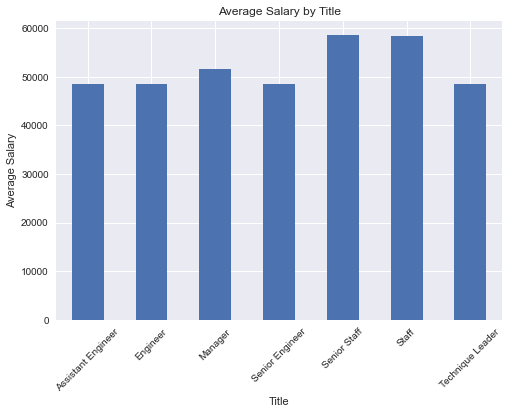

In [133]:
salary_by_title.plot.bar()
plt.title("Average Salary by Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

In [134]:
# salary_by_title = salary_by_title

# plt.bar(["Assistant Engineer", "Engineer", "Manager", "Senior Engineer", "Senior Staff", "Staff", "Technique Leader"], salary_by_title)
# plt.xticks(rotation=45)
# plt.title("Average Salary by Title")
# plt.xlabel("Title")
# plt.ylabel("Salary")

In [135]:
salary_by_title_min = salary_df.groupby("Title")["Salary"].min()
salary_by_title_min

Title
Assistant Engineer    40000
Engineer              40000
Manager               40000
Senior Engineer       40000
Senior Staff          40000
Staff                 40000
Technique Leader      40000
Name: Salary, dtype: int64

In [136]:
salary_by_title_max = salary_by_title = salary_df.groupby("Title")["Salary"].max()
salary_by_title_max

Title
Assistant Engineer     99683
Engineer              100683
Manager                72446
Senior Engineer       110449
Senior Staff          127238
Staff                 129492
Technique Leader      104065
Name: Salary, dtype: int64

In [137]:
salaries_common_df = pd.DataFrame({"Minimum Salary": salary_by_title_min,
                                  "Maximum Salary": salary_by_title_max})

